
# Classifying YELP Reviews using NLP
**Author** : Rahul Bordoloi

**Notebook used** : Google Colab



# Problem Statement

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 


# Importing Libraries and Dataset


In [1]:
#importing frequently used libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#uploading files to access in colab notebook
from google.colab import files
uploaded = files.upload()

Saving yelp.csv to yelp.csv


In [0]:
yelp_df = pd.read_csv("yelp.csv")

In [4]:
yelp_df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [5]:
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [6]:
#Observing information about the dataframe
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


# Visualising the Dataset

In [8]:
#observing the first review
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [9]:
#observing the length of the reviews
yelp_df['length'] = yelp_df['text'].apply(len)
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


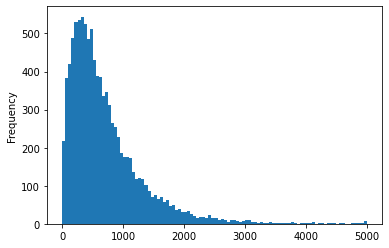

In [10]:
#frequency of how many actual reviews were long-short-intermediate
yelp_df['length'].plot(bins=100, kind='hist') 

In [11]:
#describing about the length information across all the messages
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [12]:
#observing the longest review 43952
yelp_df[yelp_df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [13]:
#observing the shortest review 
yelp_df[yelp_df['length'] == 1]['text'].iloc[0]

'X'

In [14]:
#observing the review with mean length 
yelp_df[yelp_df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

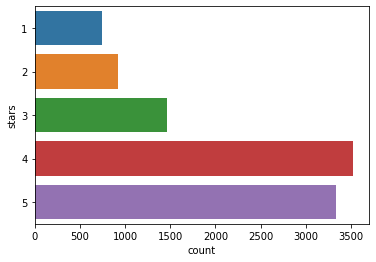

In [15]:
#observing how many reviews belongs to how many categories
sns.countplot(y = 'stars', data=yelp_df)

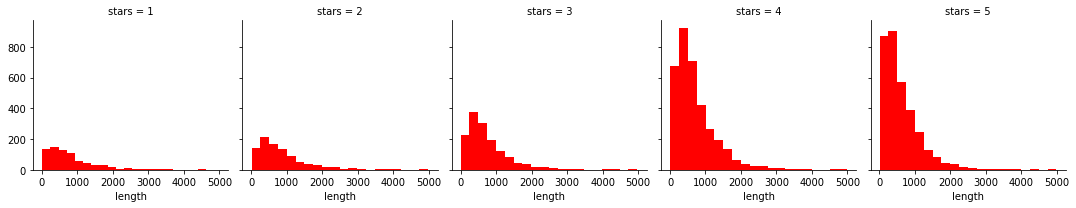

In [16]:
#distribution of length of reviews across different stars of reviews
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins = 20, color = 'r')

In [0]:
# Dividing the reviews into 1 and 5 stars
# Taking the Extremes.

In [0]:
#1 Star
yelp_df_1 = yelp_df[yelp_df['stars']==1]

In [0]:
#5 Stars
yelp_df_5 = yelp_df[yelp_df['stars']==5]

In [20]:
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [21]:
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [0]:
#concatenating 1* and 5* dataframes
yelp_df_1_5 = pd.concat([yelp_df_1 , yelp_df_5])

In [23]:
yelp_df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [24]:
#Observing information about the new dataframe
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [25]:
#knowing about the percentage of 1* reviews in our dataset
print( '1-Stars percentage =', (len(yelp_df_1) / len(yelp_df_1_5) )*100,"%")

1-Stars percentage = 18.330885952031327 %


In [26]:
#knowing about the percentage of 5* reviews in our dataset
print( '5-Stars percentage =', (len(yelp_df_5) / len(yelp_df_1_5) )*100,"%")

5-Stars percentage = 81.66911404796868 %


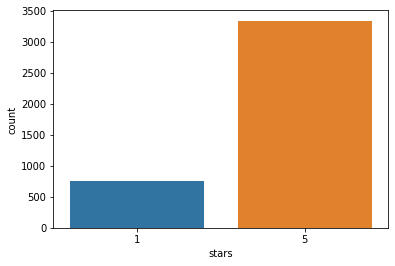

In [27]:
#visualisation of (1* vs 5*) %
sns.countplot(yelp_df_1_5['stars'], label = "Count") 

# Training and Testing our Model with whole Dataset

**Data Cleaning and preparing it for Testing**

In [28]:
#importing natural language toolkit and downloading all the classes associated with it
import string
import nltk
nltk.download('all')
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [0]:
#defining a pipeline to clean up all the messages 
#The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [0]:
#applying the function on our dataset
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [31]:
print(yelp_df_clean[0]) # showing the cleaned up version

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [32]:
print(yelp_df_1_5['text'][0]) # showing the original version

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


**Applying Count Vectorizer to our Text List**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#Defining the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [34]:
#result of the countvectorizer
print(yelp_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
yelp_countvectorizer.shape

(4086, 26435)

**Now, Training the Model with whole Dataset**

In [0]:
#training the model with Naive-Bayes Approach
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values

In [37]:
label

array([1, 1, 1, ..., 5, 5, 5])

In [38]:
NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Now, Testing the Model**

*    Example 1:

In [39]:
#defining pre-defined example 1 and transforming in into count vectorizer array and predicting the result
testing_sample = ['amazing food! highly recommmended']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([5])

*    Example 2:

In [40]:
#defining pre-defined example 1 and transforming in into count vectorizer array and predicting the result
testing_sample = ['shit food, made me sick']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1])

# Dividing Dataset into Train and Test Set before Training our Model

In [0]:
X = yelp_countvectorizer
y = label

In [42]:
X.shape

(4086, 26435)

In [43]:
y.shape

(4086,)

In [0]:
#spliting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
print(X_train.shape)
print(y_test.shape)

(3268, 26435)
(818,)


In [46]:
#Training our Dataset with Naive-Bayes' MultinomialNB Class
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# from sklearn.naive_bayes import GaussianNB 
# NB_classifier = GaussianNB()
# NB_classifier.fit(X_train, y_train)

# Evaluating the Model

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Predicting the Train set results
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([1, 1, 5, ..., 1, 5, 5])

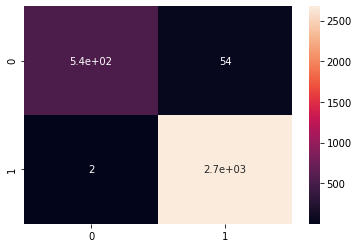

In [51]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

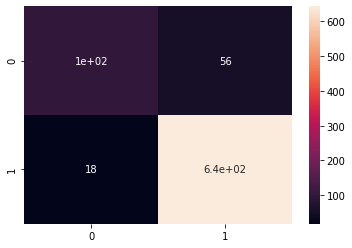

In [52]:
#Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [53]:
#observating classification report for performance evaluation
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.85      0.64      0.73       157
           5       0.92      0.97      0.95       661

    accuracy                           0.91       818
   macro avg       0.88      0.81      0.84       818
weighted avg       0.91      0.91      0.90       818



# TF-IDF [Additional Feature Extraction Method, not neccessary in this Project]



- Tf–idf stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TFIDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

In [54]:
yelp_countvectorizer

<4086x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 222391 stored elements in Compressed Sparse Row format>

In [55]:
#fitting and transforming tfidf to our object
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer().fit_transform(yelp_countvectorizer)
print(yelp_tfidf.shape)

(4086, 26435)


In [56]:
yelp_tfidf

<4086x26435 sparse matrix of type '<class 'numpy.float64'>'
	with 222391 stored elements in Compressed Sparse Row format>

In [57]:
#Sparse matrix with all the values of IF-IDF
print(yelp_tfidf[:,:])

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

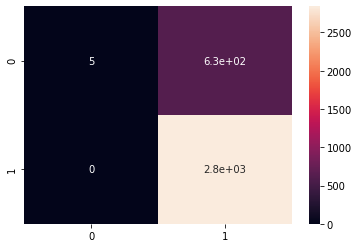

In [58]:
#now splitting dataset into train and test set
X = yelp_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#now applying Naive-Bayes to our train sets
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

#now evaluating our results
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

# End